# Exploration of University Rankings

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Data Pre-Processing

In [7]:
#Convert csv to pandas df

df = pd.read_csv("UR.csv", encoding='cp1252')

In [8]:
#Clean female to male ratio column

def fix_ratio(word):
    if type(word) == str:
        word = word.replace(" ", "")
        if word[-3:] == ":00":
            word = word[:-3]
        if len(word) == 5:
            float_word = float(word[0:2])/float(word[3:])
            return float_word
        if word[:3] == "100":
            word = 100
    return float(word)

df["Female to Male Ratio"] = df["Female to Male Ratio"].apply(fix_ratio)

df

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,0.492537,95.2000,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,0.851852,94.2000,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,0.724138,93.9000,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,0.851852,92.8000,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,0.587302,92.0000,89.4,88.6,99.7,95.4,84.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,1900.0,Penza State University,Russian Federation,17934,17.2,12%,1.272727,12.1935,14.3,8.7,7.8,16.3,32.8,2024
12426,1901.0,Universidad Peruana de Ciencias Aplicadas (UPC),Peru,56595,21.1,1%,1.000000,12.1470,13.5,8.7,10.1,15.6,26.5,2024
12427,1902.0,Universidade Federal Rural do Semi-Arido,Brazil,8687,12.4,0%,0.960784,11.9910,19.1,9.0,5.7,16.6,18.3,2024
12428,1903.0,State University of Bahia,Brazil,25067,11.9,0%,1.941176,11.5655,19.3,8.6,4.1,16.2,20.0,2024


In [9]:
#Change percentages to floats

def fix_percents(word):
    return float("0."+word[:-1])

df["International Students"] = df["International Students"].apply(fix_percents)

df

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,0.26,0.492537,95.2000,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,0.34,0.851852,94.2000,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,0.22,0.724138,93.9000,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,0.34,0.851852,92.8000,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,0.33,0.587302,92.0000,89.4,88.6,99.7,95.4,84.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,1900.0,Penza State University,Russian Federation,17934,17.2,0.12,1.272727,12.1935,14.3,8.7,7.8,16.3,32.8,2024
12426,1901.0,Universidad Peruana de Ciencias Aplicadas (UPC),Peru,56595,21.1,0.10,1.000000,12.1470,13.5,8.7,10.1,15.6,26.5,2024
12427,1902.0,Universidade Federal Rural do Semi-Arido,Brazil,8687,12.4,0.00,0.960784,11.9910,19.1,9.0,5.7,16.6,18.3,2024
12428,1903.0,State University of Bahia,Brazil,25067,11.9,0.00,1.941176,11.5655,19.3,8.6,4.1,16.2,20.0,2024


## Section 2: Data Analysis/Visualization

### Student Population and Faculty Ratio

We will start by looking at two of the most instantly apparent attributes of a univesity. Their student population and their student to faculty ratio. Both of these factors (especially the student to faculty ratio) are often used as selling points for a university. Intuitevly you would think smaller schools with lower student to faculty ratios would be the best performing as they can provide the most resources to one student. Let's see how this hypothesis holds up to the data.

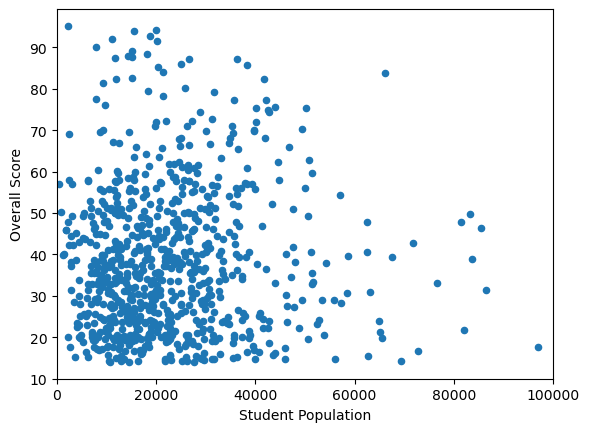

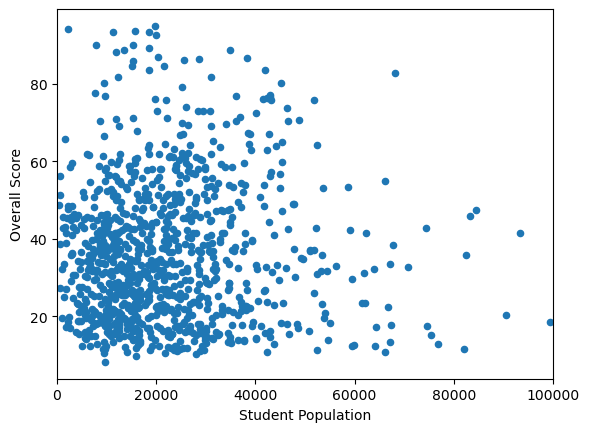

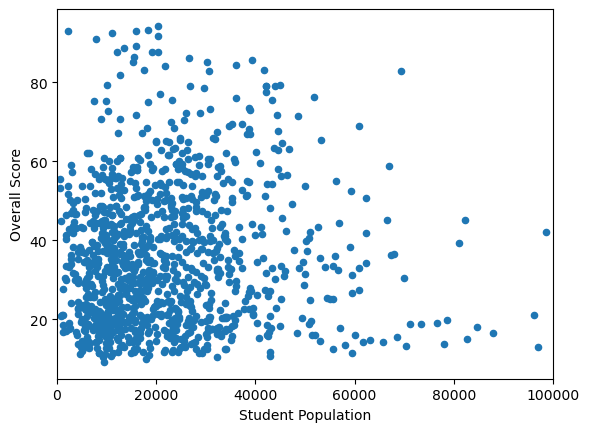

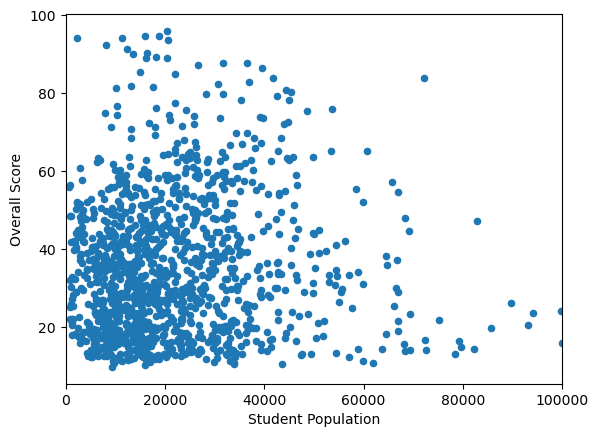

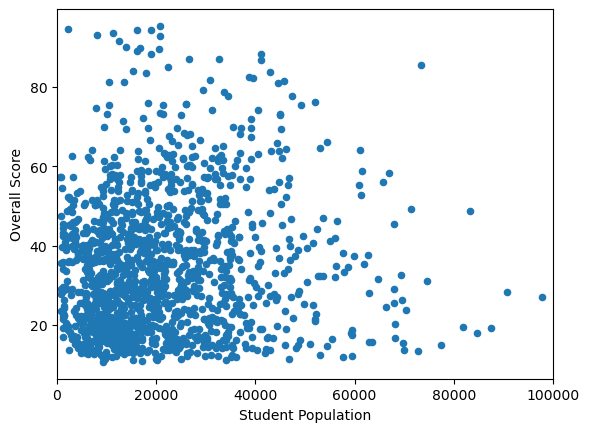

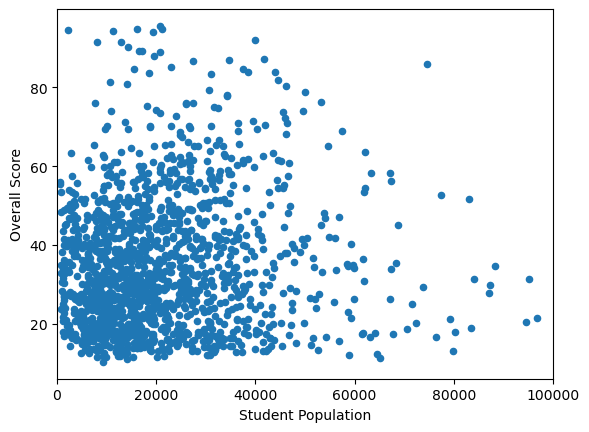

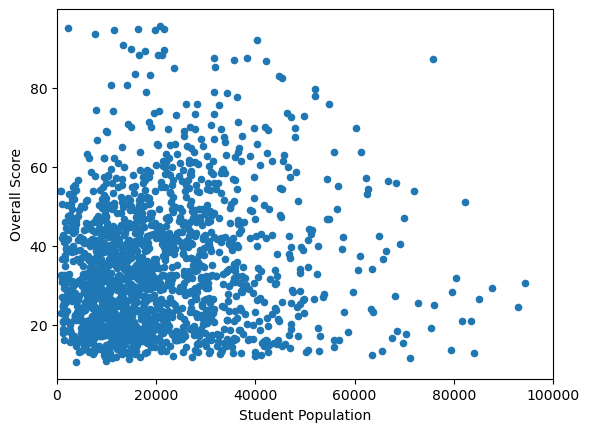

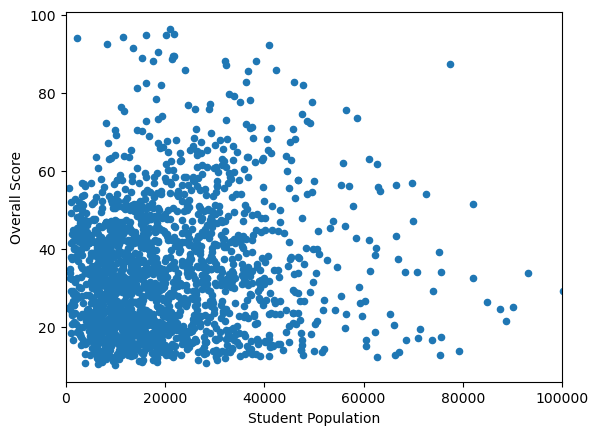

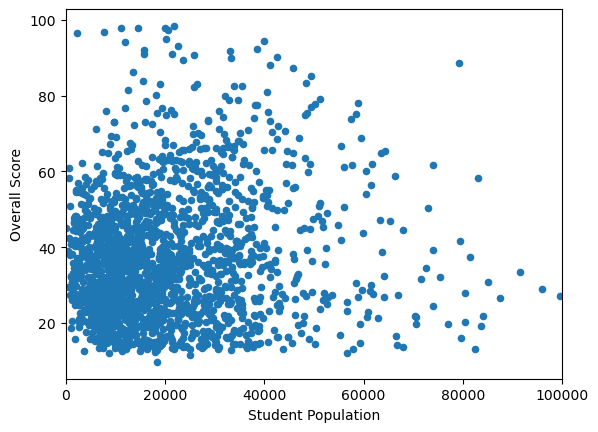

In [10]:
for i in range(2016, 2025):
    year_df = df[df['Year'] == i]
    thing = year_df.plot(x="Student Population", y="Overall Score", kind="scatter")
    thing.set_xlim(0, 100000)

(0.0, 100000.0)

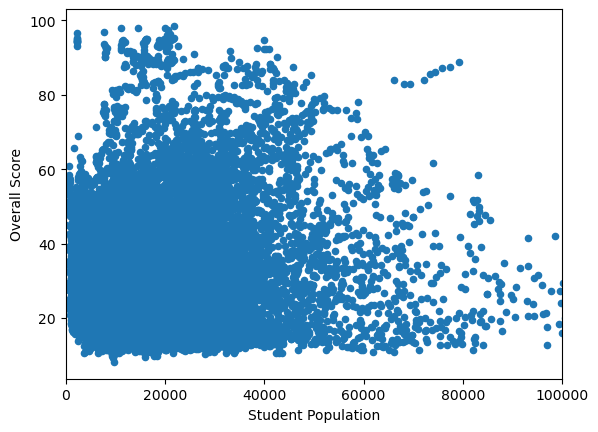

In [11]:
thing = df.plot(x="Student Population", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100000)

(0.0, 100.0)

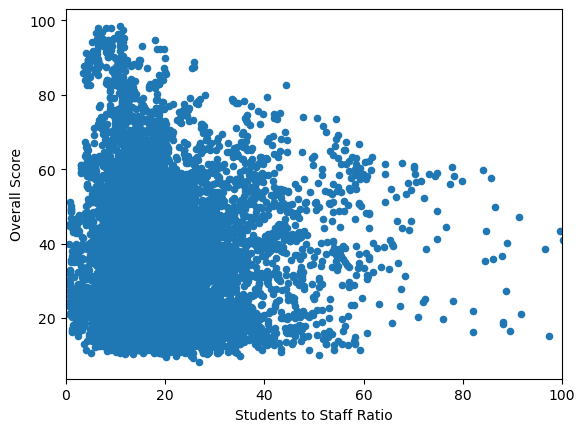

In [12]:

thing = df.plot(x="Students to Staff Ratio", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100)

Both of these charts make it more than apparent that both a relativelty low student to staff ratio and low student population tends to be correlated with higher overall school ranking year by year, making our hypothesis true.

### Gender Ratio Breakdown

Next I want to look at how the ratio of females to males on campus correlate with the overall ranking of the university. Will a good gender balance lead to a better ranking?

(0.0, 2.0)

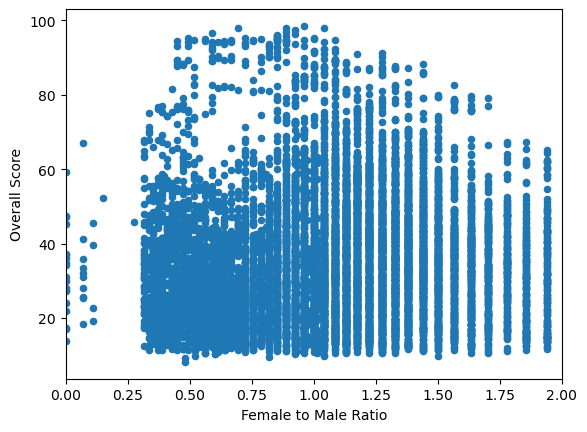

In [13]:

thing = df.plot(x="Female to Male Ratio", y="Overall Score", kind="scatter")
thing.set_xlim(0, 2)

The above graphs point to schools with either a very balanced gender ratio or a slightly male dominated population tend to perform the best when it comes to overall school rankings each year.

(98.0, 100.0)

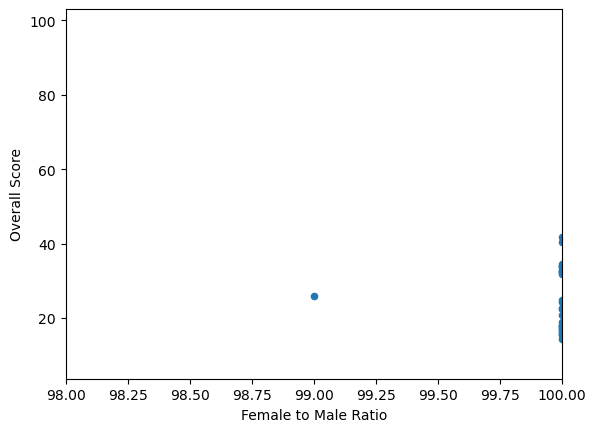

In [14]:

thing = df.plot(x="Female to Male Ratio", y="Overall Score", kind="scatter")
thing.set_xlim(98, 100)

The first set of graphs displayed the ranking of all male schools on the far left where these graphs show the ranking of all female schools on the right. Overall, none of the single gendered schools performed very well in the overall college rankings on any of the sampled years.

### Do International Students Make a Difference?

People often talk about how important it is to have cultural differences on a college campus as diversity of ideas can be incredibly good for learning and enrichment over the course of obtaining a degree. A large international population on campus is one way of obtaining this cultural diversity but how does the percentage of international students relate to the overall score of a university?

(0.0, 1.0)

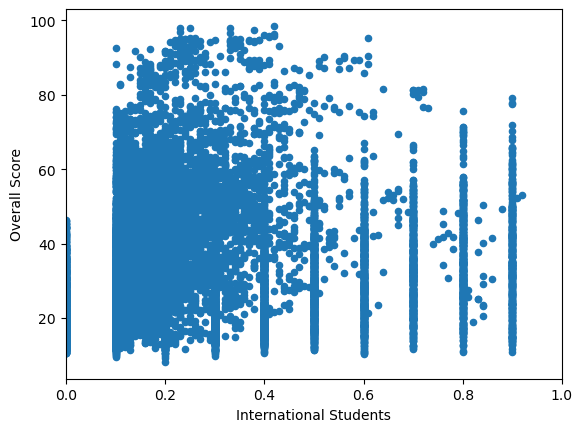

In [15]:

thing = df.plot(x="International Students", y="Overall Score", kind="scatter")
thing.set_xlim(0, 1)

Looking at this chart it appears some international student presence is important when it comes to imnproving overall college ranking but the schools that focus too heavily on international inclusion seem to faulter in other categories and do not break into the top ranks as a result.

### A Further Look Into Rankings

The overall rank of a university is comprised of 5 different categories. "Teaching", "Research Environment", "Research Quality", "Industry Impact", and "International Outlook". Which of these categories is the most indicative of a high overall score?

(0.0, 100.0)

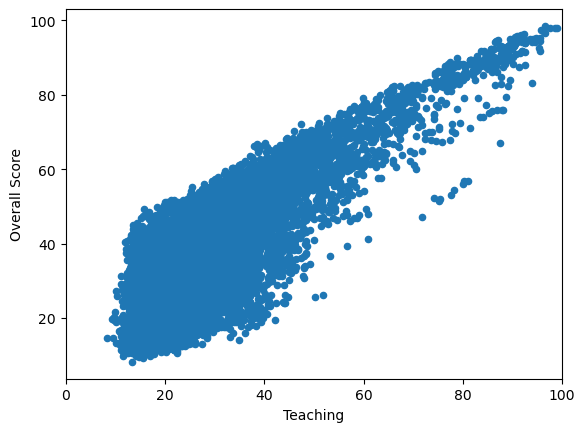

In [16]:

thing = df.plot(x="Teaching", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100)

(0.0, 100.0)

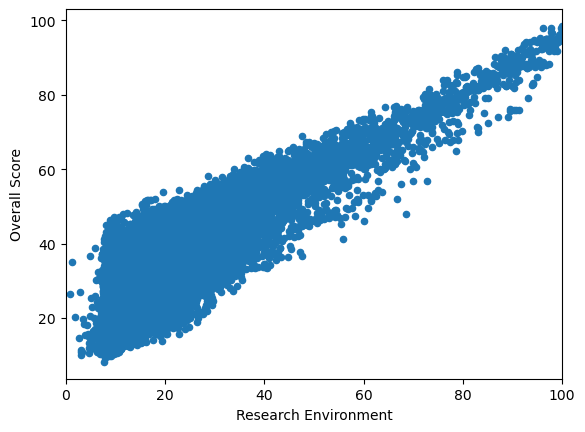

In [17]:

thing = df.plot(x="Research Environment", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100)

(0.0, 100.0)

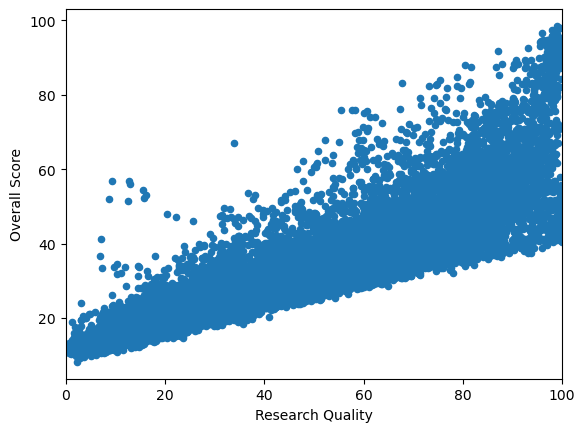

In [18]:

thing = df.plot(x="Research Quality", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100)

(0.0, 100.0)

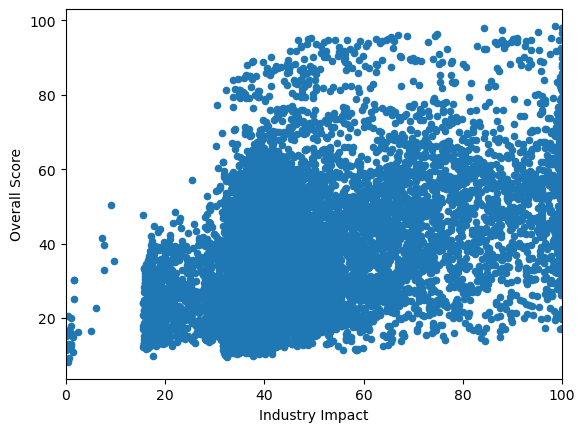

In [19]:

thing = df.plot(x="Industry Impact", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100)

(0.0, 100.0)

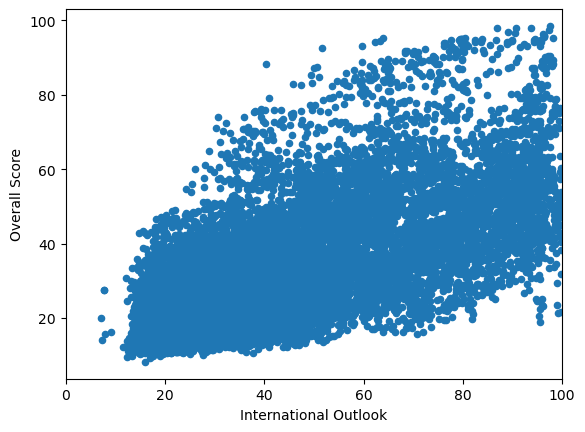

In [20]:

thing = df.plot(x="International Outlook", y="Overall Score", kind="scatter")
thing.set_xlim(0, 100)

The above charts show that every year the factors that tend to be the most indicative of a high overall university ranking are the "Teaching" and "Research Environment" scores. These charts also show a that "Research Quality" is a strong idicator but not as much as the first two. However, surprisingly past a certain point the scores for neither "Industry Impact" nor "International Outlook" are very indicative of a high overall college ranking at all. This finding for "International Outlook" makes sense when considering how a very high percentage of international students generally correlated with lower overall college ranking.

## Section 3: Data Interpretations and Conclusions